In [2]:
import findspark
findspark.init()

import pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Project").getOrCreate()

path = "C:\\Users\\PC\Desktop\\"

df = spark.read.csv(path + "netflix_titles.csv", inferSchema = True , header = True)
df_clean = df.dropna()
df_clean.toPandas()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
1,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
2,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
3,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
4,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
...,...,...,...,...,...,...,...,...,...,...,...,...
5327,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
5328,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
5329,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
5330,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [6]:
print(df_clean.columns)

['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


In [7]:
print(df_clean.printSchema())

root
 |-- show_id: string (nullable = true)
 |-- type: string (nullable = true)
 |-- title: string (nullable = true)
 |-- director: string (nullable = true)
 |-- cast: string (nullable = true)
 |-- country: string (nullable = true)
 |-- date_added: string (nullable = true)
 |-- release_year: string (nullable = true)
 |-- rating: string (nullable = true)
 |-- duration: string (nullable = true)
 |-- listed_in: string (nullable = true)
 |-- description: string (nullable = true)

None


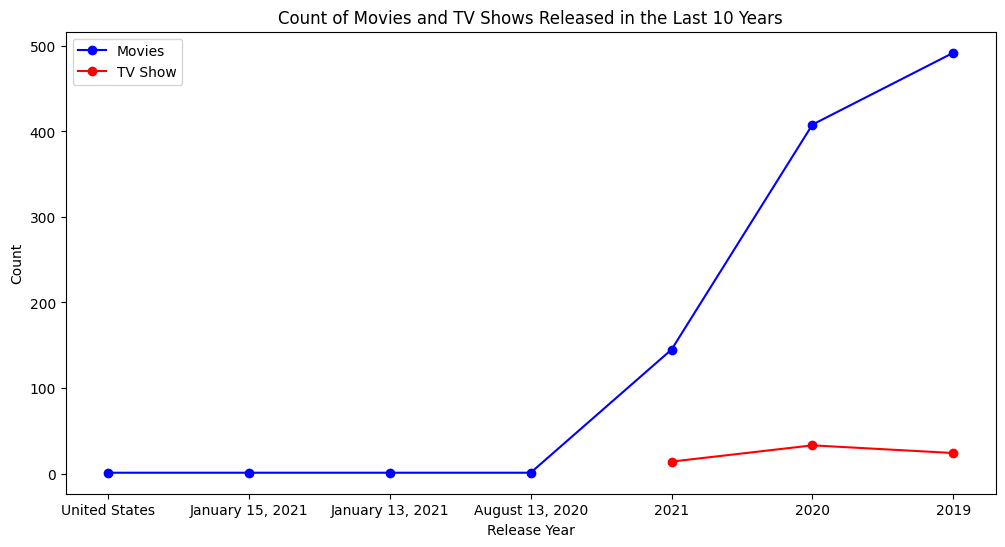

In [120]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import matplotlib.pyplot as plt
import pandas as pd


# Lấy số lượng phim và chương trình TV theo từng năm, bỏ qua các hàng không có release_year
type_year_count = df_clean.select("type", "release_year").groupBy("type", "release_year").count()

type_year_count = type_year_count.filter(col("release_year").isNotNull())

# Đảm bảo rằng câu lệnh orderBy và limit được gán vào biến để sử dụng
sorted_and_limited = type_year_count.orderBy(col("release_year").desc()).limit(10)

# Lọc ra dữ liệu cho movies và tv shows
movie_type = sorted_and_limited.filter(col("type") == "Movie").toPandas()
tv_show = sorted_and_limited.filter(col("type") == "TV Show").toPandas()


# Vẽ biểu đồ
plt.figure(figsize=(12, 6))

plt.plot(movie_type['release_year'], movie_type['count'], label='Movies', color='blue', marker='o')
plt.plot(tv_show['release_year'], tv_show['count'], label='TV Show', color='red', marker='o')

plt.xlabel("Release Year")
plt.ylabel("Count")
plt.title("Count of Movies and TV Shows Released in the Last 10 Years")

# Thêm legend
plt.legend()

# Đảo ngược trục x để hiển thị năm mới nhất ở bên phải nếu cần
# plt.gca().invert_xaxis()

# Hiển thị biểu đồ
plt.show()


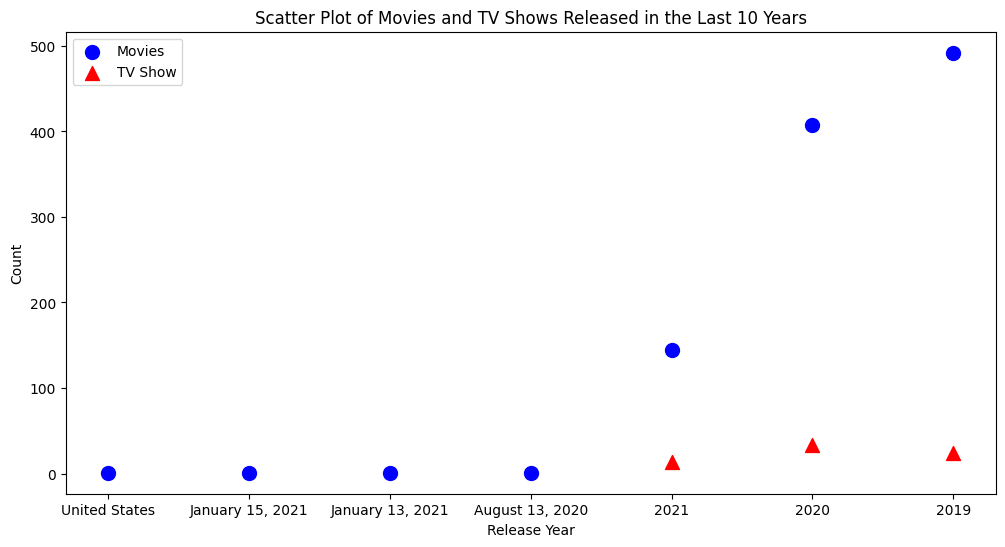

In [121]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import matplotlib.pyplot as plt

# Giả sử df_clean là DataFrame của bạn và SparkSession đã được khởi tạo

# Lấy số lượng phim và chương trình TV theo từng năm, bỏ qua các hàng không có release_year
type_year_count = df_clean.select("type", "release_year").groupBy("type", "release_year").count()

# Lọc dữ liệu để chỉ giữ lại những năm có dữ liệu và giới hạn 10 năm gần nhất
type_year_count = type_year_count.filter(col("release_year").isNotNull())
sorted_and_limited = type_year_count.orderBy(col("release_year").desc()).limit(10)

# Lấy dữ liệu cho Movies và TV Shows sau khi đã được sắp xếp và giới hạn
movie_type = sorted_and_limited.filter(col("type") == "Movie").toPandas()
tv_show = sorted_and_limited.filter(col("type") == "TV Show").toPandas()

# Vẽ biểu đồ phân tán
plt.figure(figsize=(12, 6))

# Sử dụng dữ liệu từ Pandas DataFrame để vẽ
plt.scatter(movie_type['release_year'], movie_type['count'], color='blue', label='Movies', marker='o', s=100)
plt.scatter(tv_show['release_year'], tv_show['count'], color='red', label='TV Show', marker='^', s=100)

plt.xlabel("Release Year")
plt.ylabel("Count")
plt.title("Scatter Plot of Movies and TV Shows Released in the Last 10 Years")

# Thêm chú giải (legend)
plt.legend()

# Hiển thị biểu đồ
plt.show()


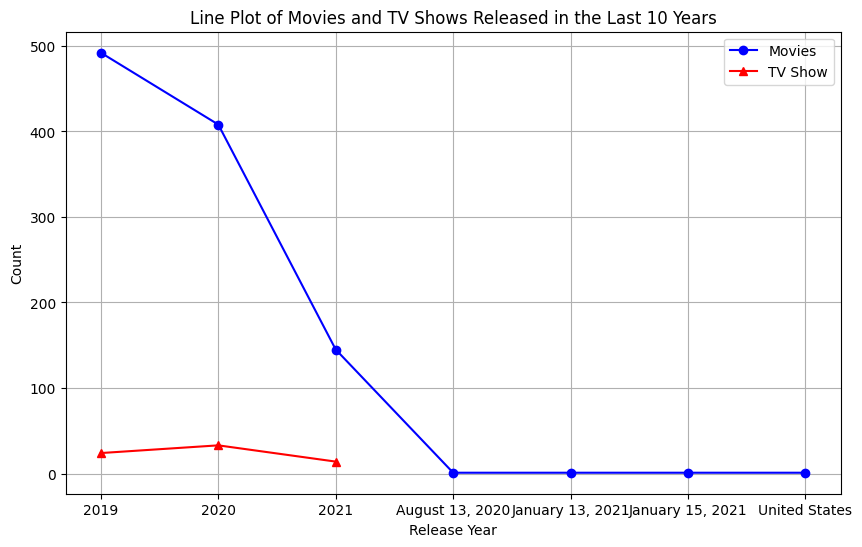

In [122]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import matplotlib.pyplot as plt
import pandas as pd

# Giả sử SparkSession đã được khởi tạo
spark = SparkSession.builder.appName("visualize_movies_tvshows_line").getOrCreate()

# Lấy số lượng phim và chương trình TV theo từng năm, bỏ qua các hàng không có release_year
type_year_count = df_clean.select("type", "release_year").groupBy("type", "release_year").count()

# Lọc dữ liệu để chỉ giữ lại những năm có dữ liệu
type_year_count = type_year_count.filter(col("release_year").isNotNull())

# Sắp xếp dữ liệu và giới hạn 10 năm gần nhất
sorted_and_limited = type_year_count.orderBy(col("release_year").desc()).limit(10)

# Chuyển dữ liệu sang Pandas DataFrame để dễ dàng vẽ biểu đồ
type_year_pd = sorted_and_limited.toPandas()

# Sắp xếp dữ liệu Pandas DataFrame theo năm
type_year_pd = type_year_pd.sort_values(by="release_year")

# Tách dữ liệu cho Movies và TV Shows
movies_data = type_year_pd[type_year_pd['type'] == 'Movie']
tv_shows_data = type_year_pd[type_year_pd['type'] == 'TV Show']

# Vẽ biểu đồ đường
plt.figure(figsize=(10, 6))

plt.plot(movies_data['release_year'], movies_data['count'], label='Movies', color='blue', marker='o')
plt.plot(tv_shows_data['release_year'], tv_shows_data['count'], label='TV Show', color='red', marker='^')

plt.xlabel("Release Year")
plt.ylabel("Count")
plt.title("Line Plot of Movies and TV Shows Released in the Last 10 Years")

plt.legend()
plt.grid(True)

plt.show()


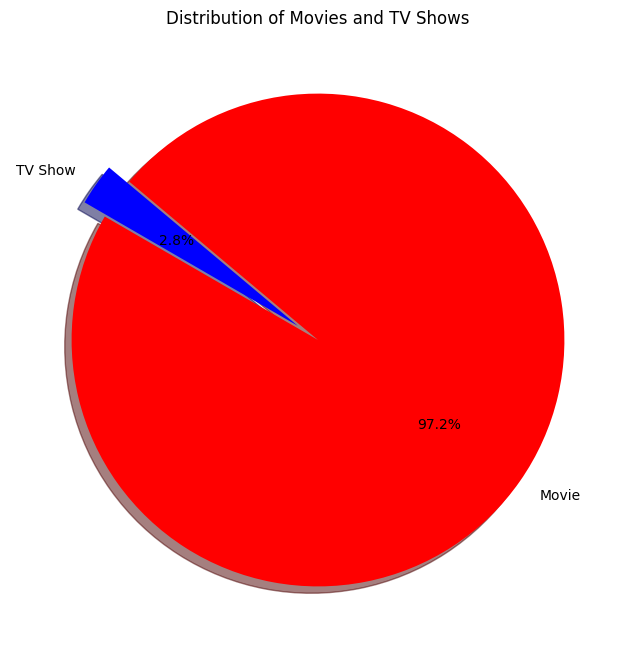

In [125]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import matplotlib.pyplot as plt

# Giả sử SparkSession đã được khởi tạo và df_clean là DataFrame đã làm sạch

# Lấy số lượng phim và chương trình TV theo từng năm, bỏ qua các hàng không có release_year
type_year_count = df_clean.select("type", "release_year").groupBy("type").count()

# Lấy dữ liệu về tổng số lượng phim và TV shows
total_count = type_year_count.collect()

# Chuẩn bị dữ liệu cho biểu đồ hình tròn
labels = [row['type'] for row in total_count]
sizes = [row['count'] for row in total_count]
colors = ['blue', 'red']  # Màu cho Movies và TV Shows
explode = (0.1, 0)  # "Nhô" phần tử đầu tiên ra một chút

# Vẽ biểu đồ hình tròn
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)

plt.title("Distribution of Movies and TV Shows")
plt.show()


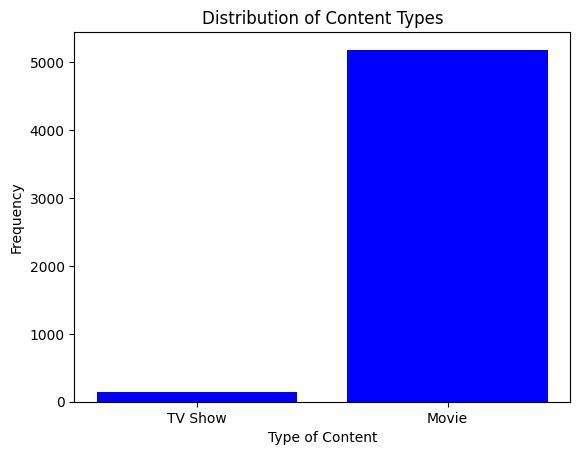

In [145]:


# Tính toán số lượng cho mỗi loại
type_count_df = df_clean.groupBy("type").count()

# Chuyển dữ liệu từ Spark DataFrame sang Pandas DataFrame để vẽ biểu đồ
type_count_pd = type_count_df.toPandas()

# Lấy dữ liệu cho biểu đồ
types = type_count_pd['type'].tolist()
counts = type_count_pd['count'].tolist()

# Vẽ biểu đồ cột
plt.bar(types, counts, color='blue')

# Thêm các nhãn và tiêu đề
plt.xlabel("Type of Content")
plt.ylabel("Frequency")
plt.title("Distribution of Content Types")

# Hiển thị biểu đồ
plt.show()


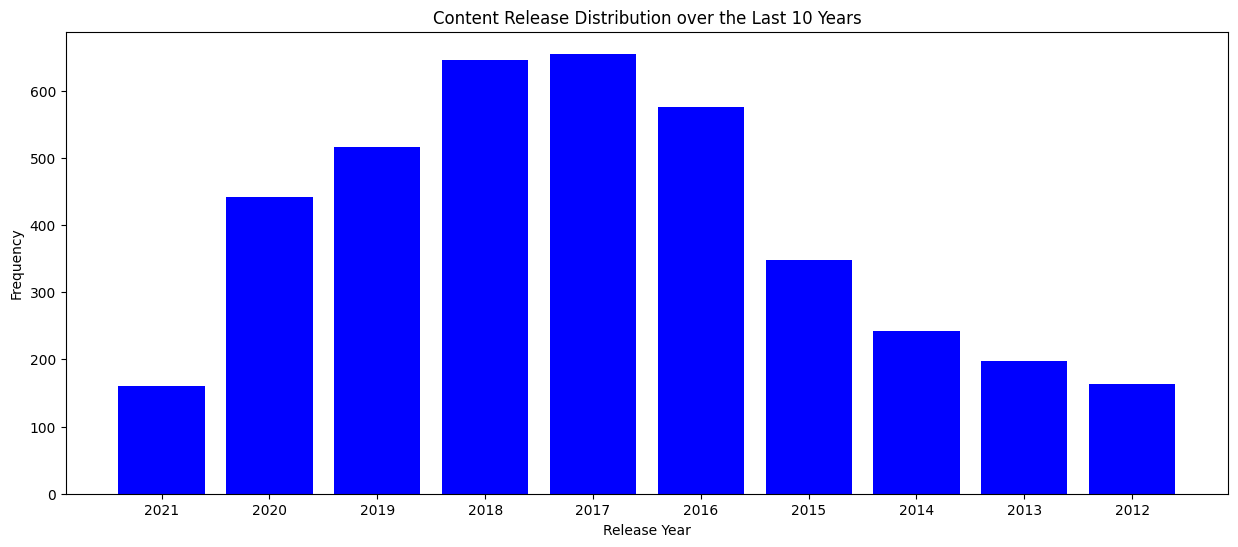

In [183]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import col, regexp_extract, length

# Lọc và nhóm dữ liệu
filtered_df = df_clean.withColumn("year", regexp_extract(col("release_year"), "(\d{4})", 1))
filtered_df = filtered_df.filter(length(col("year")) == 4)

type_year_count = filtered_df.groupBy("year") \
                             .count() \
                             .orderBy(col("year").desc()) \
                             .limit(10)

# Chuyển đổi sang Pandas DataFrame và sắp xếp lại (nếu cần)
type_year_pd = type_year_count.toPandas()

# Vẽ biểu đồ cột
plt.figure(figsize=(15, 6))
plt.bar(type_year_pd['year'], type_year_pd['count'], color='blue')

# Đặt nhãn và tiêu đề
plt.xlabel("Release Year")
plt.ylabel("Frequency")
plt.title("Content Release Distribution over the Last 10 Years")

# Hiển thị biểu đồ
plt.show()


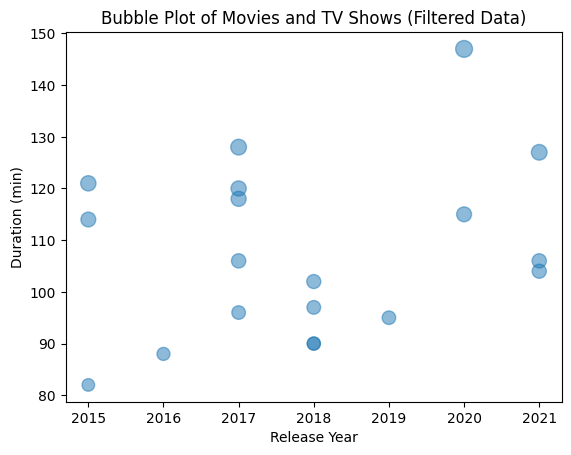

In [5]:
from pyspark.sql.functions import col, regexp_replace
# Lọc ra chỉ những hàng mà 'release_year' chỉ chứa 4 chữ số và đổi kiểu dữ liệu
df_filtered = df_clean.withColumn("duration", regexp_replace(col("duration"), " min", "").cast("integer")) \
                      .withColumn("year", regexp_replace(col("release_year"), "\D*", "").cast("integer")) \
                      .filter(col("year").isNotNull()) \
                      .filter(col("year") >= 2015)  # Ví dụ: lọc dữ liệu từ năm 2015 trở lên

# Giới hạn số lượng bản ghi để vẽ
df_limited = df_filtered.limit(20)  # Giới hạn là 50 bản ghi

# Chuyển đổi sang Pandas DataFrame
pandas_df = df_limited.toPandas()

# Sử dụng kích thước mặc định cho bong bóng
plt.scatter('year', 'duration', s=pandas_df['duration'], alpha=0.5, data=pandas_df)

plt.xlabel('Release Year')
plt.ylabel('Duration (min)')
plt.title('Bubble Plot of Movies and TV Shows (Filtered Data)')

plt.show()


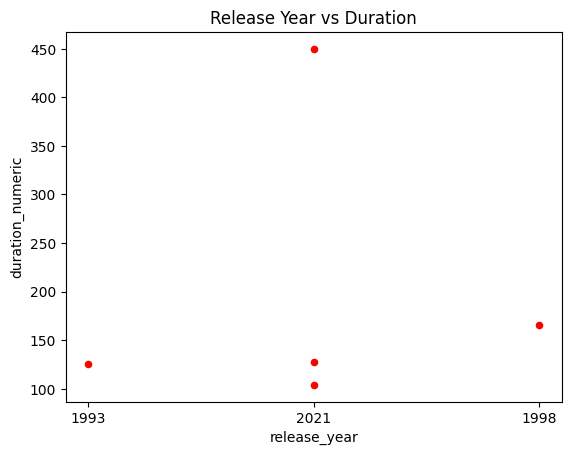

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

df_pandas = df_clean.select("type", "title", "director", "release_year", "duration").limit(5).toPandas()


def convert_duration(duration):
    try:
        if 'min' in duration:
            return int(duration.replace('min', '').strip())
        elif 'Season' in duration:
            # Giả sử mỗi 'Season' có 450 phút
            number_of_seasons = int(duration.split()[0])
            return number_of_seasons * 50  # Thay đổi giá trị này tùy theo cách bạn muốn ước lượng cho 'Season'
        else:
            return None
    except Exception as e:
        print(f"Error converting duration: {duration}. Error: {e}")
        return None

# Tiếp tục với việc áp dụng hàm này cho cột 'duration' và loại bỏ các giá trị None như trước
df_pandas['duration_numeric'] = df_pandas['duration'].apply(convert_duration)
df_pandas = df_pandas.dropna(subset=['duration_numeric'])


# Loại bỏ bất kỳ hàng nào chứa giá trị 'None'
df_pandas = df_pandas.dropna(subset=['duration_numeric'])

# Vẽ biểu đồ phân tán với pandas
df_pandas.plot(kind='scatter', x='release_year', y='duration_numeric', color='red', title='Release Year vs Duration')

# Hiển thị biểu đồ
plt.show()


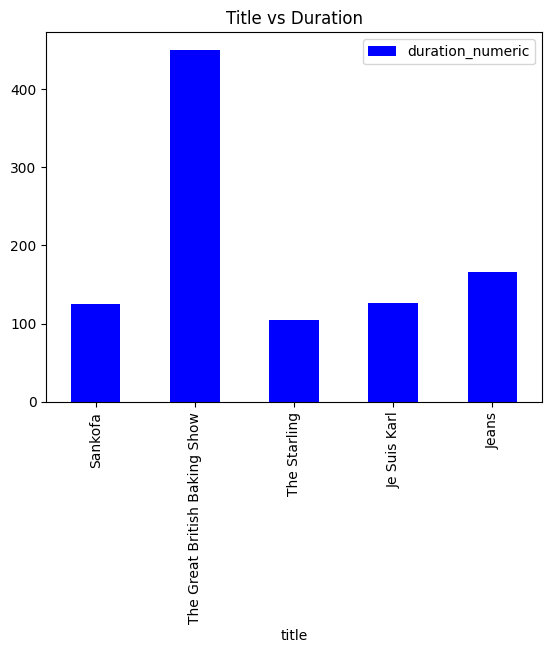

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Giả định df_pandas là DataFrame của bạn
# Bạn đã chuyển đổi cột 'duration' thành số và lưu vào 'duration_numeric'

# Chuyển đổi 'release_year' sang kiểu dữ liệu số (nếu cần)
df_pandas['release_year'] = pd.to_numeric(df_pandas['release_year'], errors='coerce')

# Sử dụng 'duration_numeric' cho biểu đồ
df_pandas.plot(kind='bar', x='title', y='duration_numeric', color='blue', title='Title vs Duration')

# Hiển thị biểu đồ
plt.show()


In [71]:
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql.functions import udf
from pyspark.sql.types import IntegerType
from bokeh.plotting import figure
from bokeh.plotting import output_notebook
from bokeh.plotting import show
from pyspark.sql.functions import desc


# Giả định df_clean là Spark DataFrame của bạn

# Định nghĩa UDF (User Defined Function) để chuyển đổi cột duration trong Spark DataFrame
def convert_duration(duration):
    try:
        if 'min' in duration:
            return int(duration.replace('min', '').strip())
        elif 'Season' in duration:
            # Giả sử mỗi 'Season' có 450 phút
            number_of_seasons = int(duration.split()[0])
            return number_of_seasons * 450  # Thay đổi giá trị này tùy theo cách bạn muốn ước lượng cho 'Season'
        else:
            return None
    except Exception:
        return None

# Đăng ký UDF với PySpark
convert_duration_udf = udf(convert_duration, IntegerType())

# Áp dụng UDF để tạo cột mới trong Spark DataFrame
df_clean = df_clean.withColumn("duration_numeric", convert_duration_udf("duration"))

# Chuyển đổi Spark DataFrame sang Pandas DataFrame
df_pandas = df_clean.select("release_year", "duration_numeric")\
                    .orderBy(desc("duration_numeric"))\
                    .limit(10)\
                    .toPandas()

# Tiếp tục với việc loại bỏ các giá trị None nếu cần
df_pandas.dropna(subset=['duration_numeric'], inplace=True)

# Đoạn mã này giờ đây sẽ chạy mà không gặp lỗi
x_list = df_pandas["duration_numeric"].tolist()
y_list = df_pandas["release_year"].tolist()

output_notebook()
# Instantiate a figure
fig= figure(title="Release Year vs Duration")
# Create scatter circle marker plot by rendering the circles
fig.circle(x_list, y_list, size = 10, color = "red", alpha = 0.7)
# Show the plot
show(fig)


Loading BokehJS ...

In [72]:
# Instantiate a figure
p = figure()
# create a line plot
p.line(x_list, y_list, line_width = 1, color = "red")
# Show the plot
show(p)


In [97]:
from bokeh.plotting import figure, output_notebook, show
from bokeh.layouts import row

df_pandas = df_clean.toPandas()  # Chuyển Spark DataFrame df_clean sang Pandas DataFrame


# Giả sử df_pandas là DataFrame của Pandas đã chứa dữ liệu bạn cần
x_list = df_pandas['release_year']
y_list = df_pandas['duration_numeric'] 

output_notebook()

fig1 = figure()
fig2 = figure()
fig3 = figure()

# Vẽ các biểu đồ scatter
fig1.circle(y_list, x_list , size=8, color="green", alpha=0.5)
fig2.circle(x_list, y_list, size=8, color="blue", alpha=0.5)
fig3.circle(y_list, y_list, size=8, color="red", alpha=0.5)

# Tạo row layout và hiển thị biểu đồ
row_layout = row(fig1, fig2, fig3)
show(row_layout)

print(df_pandas.columns)


Loading BokehJS ...

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'duration_numeric'],
      dtype='object')


In [98]:
# Create column layout
col_layout = column(fig1, fig2, fig3)
# Show the plot
show(col_layout)

In [99]:
# Import the required modules
from bokeh.plotting import figure, output_notebook, show
# Import the required modules
from bokeh.plotting import figure
from bokeh.plotting import output_notebook
from bokeh.plotting import show
from bokeh.layouts import row, column
# Import iris flower dataset as pandas DataFrame
from bokeh.sampledata.iris import flowers as df

x_list = df_pandas['release_year']
y_list = df_pandas['duration_numeric'] 

# Output to notebook
output_notebook()
# Instantiate a figure
fig1 = figure()
fig2 = figure()
fig3 = figure()
# Create scatter marker plot by render the circles
fig1.circle(df_pandas['duration_numeric'], df_pandas['release_year'], size=8, color = "green", alpha = 0.5)
fig2.circle(df_pandas['release_year'], df_pandas['duration_numeric'], size=8, color = "blue", alpha = 0.5)
fig3.circle(df_pandas['duration_numeric'], df_pandas['duration_numeric'], size=8, color = "red", alpha = 0.5)
# Create nested layout
nasted_layout = row(fig1, column(fig2, fig3))
# Show the plot
show(nasted_layout)

Loading BokehJS ...

In [100]:
# Import the required modules
from bokeh.plotting import figure
from bokeh.plotting import output_notebook
from bokeh.plotting import show
from bokeh.layouts import gridplot
# Import iris flower dataset as pandas DataFrame
from bokeh.sampledata.iris import flowers as df
# Output to notebook
output_notebook()
# Instantiate a figure
fig1 = figure()
fig2 = figure()
fig3 = figure()
# Create scatter marker plot by render the circles
fig1.circle(df_pandas['duration_numeric'], df_pandas['release_year'], size=8, color = "green", alpha = 0.5)
fig2.circle(df_pandas['release_year'], df_pandas['duration_numeric'], size=8, color = "blue", alpha = 0.5)
fig3.circle(df_pandas['duration_numeric'], df_pandas['duration_numeric'], size=8, color = "red", alpha = 0.5)
# Create a grid layout
grid_layout = gridplot([[fig1, fig2], [None,fig3]])
# Show the plot
show(grid_layout)


Loading BokehJS ...

In [117]:
from bokeh.plotting import figure
from bokeh.plotting import output_notebook
from bokeh.plotting import show
from bokeh.models import CategoricalColorMapper
from bokeh.sampledata.iris import flowers as df

output_notebook()

# Tạo đối tượng figure
fig = figure( title="Duration and Release",  x_axis_label='Realease Year', y_axis_label= 'Duaration')

# Vẽ biểu đồ scatter cho mỗi loài
for specie, color in zip(['setosa', 'virginica', 'versicolor'], ['blue', 'green', 'red']):
    data = df[df.species == specie]
    fig.circle(df_pandas['duration_numeric'], df_pandas['release_year'], size=8, color=color, alpha=0.7, legend_label=specie, source=data)

# Thiết lập vị trí và chính sách click cho legend
fig.legend.location = 'top_left'
fig.legend.click_policy = "hide"

# Hiển thị biểu đồ
show(fig)


Loading BokehJS ...

RuntimeError: 

Expected x and y to reference fields in the supplied data source.

When a 'source' argument is passed to a glyph method, values that are sequences
(like lists or arrays) must come from references to data columns in the source.

For instance, as an example:

    source = ColumnDataSource(data=dict(x=a_list, y=an_array))

    p.circle(x='x', y='y', source=source, ...) # pass column names and a source

Alternatively, *all* data sequences may be provided as literals as long as a
source is *not* provided:

    p.circle(x=a_list, y=an_array, ...)  # pass actual sequences and no source



In [ ]:
# Import the required modules
from bokeh.plotting import figure
from bokeh.plotting import output_notebook
from bokeh.plotting import show
from bokeh.models import CategoricalColorMapper
# Import iris flower dataset as pandas DataFrame
from bokeh.sampledata.iris import flowers as df
# Output to notebook
output_notebook()
# Instantiate a figure object
fig = figure( title="Petal length Vs.Petal Width", x_axis_label='petal_length', y_axis_label='petal_width')
# Create scatter marker plot by render the circles
for specie, color in zip(['setosa', 'virginica','versicolor'], ['blue',
'green', 'red']):
 data = df[df.species==specie]
 fig.circle('petal_length', 'petal_width', size=8, color=color, alpha =
0.7,legend_label=specie,source=data,
 muted_color=color, muted_alpha=0.2)
# Set the legend location and click policy
fig.legend.location = 'top_left'
fig.legend.click_policy="mute"
# Show the plot
show(fig)